In [48]:
from src.parser.document_parser import DocumentParser
from src.tokenizer.tokenizer_driver import TokenizerDriver
from src.featurizer.feature_extractor import FeatureExtractor
from src.cluster.kmeans_cluster import KmeansCluter
import matplotlib.pyplot as plt

In [2]:
REPORTS_PATH = "data/demo_reports/"

doc_parser = DocumentParser(REPORTS_PATH)
tok_driver = TokenizerDriver()
featurizer = FeatureExtractor()
claim_sents = doc_parser.parse_documents()

In [3]:
print("Number of claims: ", len(claim_sents))
print(claim_sents[:10])

Number of claims:  4504
[The Paris Agreement on climate change, which entered into force in November 2016,
is at its heart an agreement about energy., Transformative change in the energy sector,
the source of at least two-thirds of greenhouse-gas emissions, is essential to reach the
objectives of the Agreement., Growth in energy-related CO2 emissions stalled
completely in 2015., This was mainly due to a 1.8% improvement in the energy intensity of
the global economy, a trend bolstered by gains in energy efficiency, as well as the expanded
use of cleaner energy sources worldwide, mostly renewables., An increasing slice of the
roughly $1.8 trillion of investment each year in the energy sector has been attracted to
clean energy, at a time when investment in upstream oil and gas has fallen sharply., The
value of fossil-fuel consumption subsidies dropped in 2015 to $325 billion, from almost
$500 billion the previous year, reflecting lower fossil-fuel prices but also a subsidy reform
process 

In [4]:
tokenized_sents = tok_driver.tokenize_claims(claim_sents)

In [5]:
features = featurizer.featurize_claims(tokenized_sents)

In [70]:
kmeans_cluster = KmeansCluter()
clusters = kmeans_cluster.get_clusters(features)
claims_cluster_df = kmeans_cluster.get_claims_cluster_df(tokenized_sents)

Claims Num: 4504, Clusters Num: 4504


In [71]:
claims_cluster_df

,claim,cluster
0,paris agreement climate change entered force n...,14
1,transformative change energy sector source thi...,14
2,growth energy related co2 emissions stalled co...,1
3,mainly 1.8 improvement energy intensity global...,14
4,increasing slice roughly $ 1.8 trillion invest...,14
5,value fossil fuel consumption subsidies droppe...,14
6,task world energy outlook weo takes different ...,14
7,paris climate pledges covering 190 countries e...,14
8,stringent decarbonisation options examined weo...,14
9,© oecd iea 2016 \n\n,9


In [77]:
grouped_cluster_df = claims_cluster_df.groupby("cluster").size().reset_index(name="count")

In [78]:
grouped_cluster_df

,cluster,count
0,0,78
1,1,281
2,2,162
3,3,55
4,4,313
5,5,179
6,6,126
7,7,270
8,8,20
9,9,93


In [79]:
#sample 5 random claims from each cluster 
samples_by_cluster_df = claims_cluster_df.groupby("cluster").apply(lambda x: x.sample(n=5))

In [80]:
samples_by_cluster_df

claim cluster
cluster                                                                
0       1091  13.9 \n\n 11.7 \n\n 10.8 \n\n 9.8 \n\n 9.0 \n\...       0
        3880  additional demand current consumers \n\n 3 \n\...       0
        3526  efficiency improvements energy demand 10 highe...       0
        958   -20 \n\n -10 \n\n 0 \n\n 10 \n\n 20 \n\n indus...       0
        177   new granular model power market developed spec...       0
1       2861  80 \n\n 15 \n\n 60 \n\n non oecd electricity d...       1
        2975  primary energy demand increased 70 2000 coal a...       1
        3442  rate growth annual average 3.7 roughly twice f...       1
        2964  demand mobility today heavily correlated consu...       1
        2858  notwithstanding rapid growth electricity provi...       1
2       2469            2016 \n\n focus china net exporter coal       2
        2537  mt \n\n 190 mtce \n\n 2 966 twh \n\n 100 \n\n ...       2
        4384  twh \n\n million tonnes oil equivalent million...       2
        2151  coal ’s share china ’s energy mix drops thirds...       2
        2331  lignite primarily produced european union russ...       2
3       1822  b asia \n\n 200 150 100 50 15 \n\n dollars mwh...       3
        2475                         300 \n\n 200 \n\n 100 \n\n       3
        1243  cost comparison bevs assumed range 200 km 2015...       3
        2443                            furnace \n\n 1 200 \n\n       3
        2303  1 200 \n\n 1 800 \n\n 2 400 \n\n 3 000 \n\n mt...       3
4       1675  result prior 2030 operators invest assumption ...       4
        4174  sustainable development scenario switch tradit...       4
        699   taken supply gap 450 scenario needs filled new...       4
        393   new policies scenario \n\n current policies sc...       4
        187   new policies scenario net importing countries ...       4
5       2936  2017 \n\n  future energy trends southeast asi...       5
        4328   annex | southeast asia projections \n\n 135 \n\n       5
        3010  signs rapid rise coal fired capacity tripled 2...       5
        3483  efforts governments southeast asia rebalance g...       5
        3508  reflecting economic development demographic ch...       5
...                                                         ...     ...
12      1815          global energy trends \n\n
 figure 4.6 ⊳        12
        565           global energy trends \n\n
 figure 2.7 ⊳        12
        1058             global energy trends \n\n
 box 3.1 ⊳        12
        835   global energy trends \n\n
 improved biomass co...      12
        715   competitive markets investments responding mar...      12
13      3527                industry4 \n\n © oecd iea 2017 \n\n      13
        3496                               © oecd iea 2017 \n\n      13
        3705                               © oecd iea 2017 \n\n      13
        3544       100 \n\n © oecd iea 2017 \n\n 2016 \n\n 2040      13
        4232  \n\n © oecd iea 2017 \n\n energy demand mtoe \...      13
14      1800             additional 2040 \n\n middle east china      14
        3908  values fossil fuels account regional differenc...      14
        331   liquid petroleum based fuels feeding internal ...      14
        1241                       united states \n\n 2015 2040      14
        400   net trend oecd countries consume energy 2040 t...      14
15      4368  6 \n\n 7 \n\n 9 \n\n 9 \n\n 16 \n\n 27 \n\n 2 ...      15
        3647  0.5 \n\n 2016 \n\n 2025 \n\n 2030 \n\n 2035 \n...      15
        3874  myanmar 2000 \n\n 2016 \n\n 2020 \n\n 2030 \n\...      15
        2333  2025 \n\n 2030 \n\n 2035 \n\n 2040 \n\n 1 381 ...      15
        2697  caagr 2014 2040 \n\n 2020 \n\n 2025 \n\n 2030 ...      15
16      1336  production 2040 exceed 8 mb d resources high f...      16
        1471  largest north america disappears list crude oi...      16
        3645                              mb d \n\n figure 2.11      16
        1306  canada curre

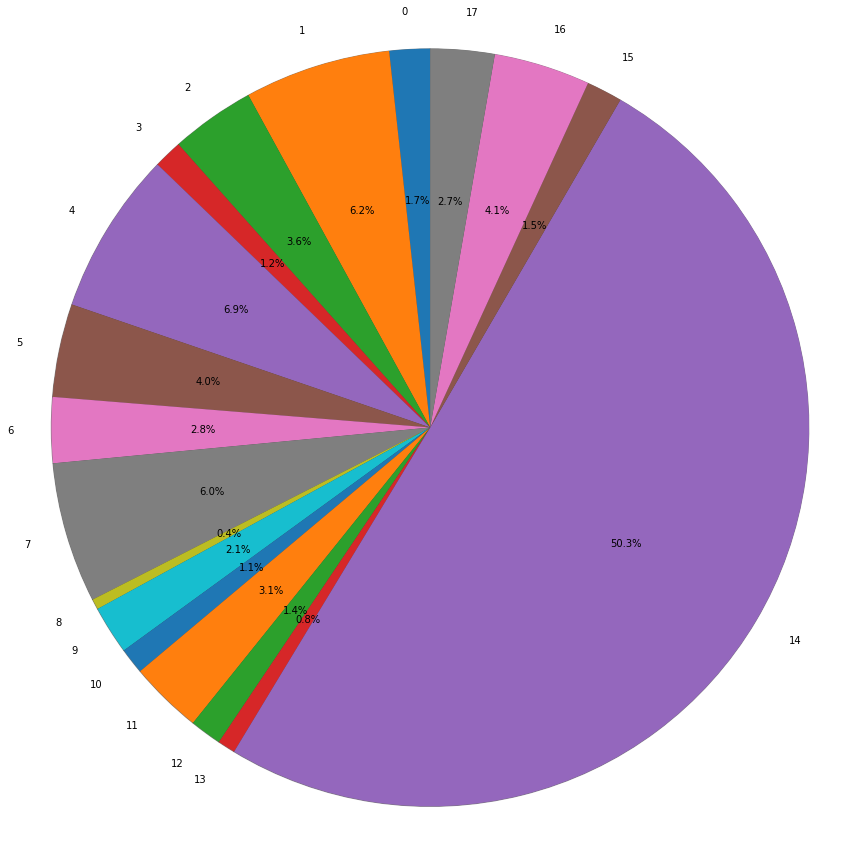

In [82]:
labels = list(grouped_cluster_df.index)
sizes = list(grouped_cluster_df["count"])
fig1, ax1 = plt.subplots()
fig1.set_size_inches(15,15)
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, radius=51)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig("plots/tfidf_kmeans_18clusters.png")
plt.show()

In [81]:
samples_by_cluster_df.to_csv("data/clustering/tfidf_kmeans_5random_samples.csv")